# Classification of MNIST Digits with SVD Decomposition.
The task for this exercise is to learn the classification of MNIST digits by using SVD decomposition.
Remember that, Given a matrix $X \in R^{m×n}$ and its SVD decomposition $X = USV^T$ we can prove that
an orthogonal base for the space of the columns is given by the first $p$ columns of the matrix $U$, where
$p = rank(X)$ is equal to the number of non-zero singular values of $A$.$$ $$
We will make use of the space of the columns defined by the $U$ matrix and the following Theorem:
#### Theorem 1 
*Let’s consider $W$ a subspace of $R^n$ where $dim(W) = s$ and ${w_1, . . . , w_s}$ an orthogonal base of
$W$. Given a generic $y \in R^n$ we have that the projection $y^{\perp}$ of $y$ onto $W$ has the following form:*
$$y^{\perp} =\frac{y\cdot w_1}
{w_1 · w_1}w_1+ ··· +\frac{y \cdot w_s}{ws \cdot ws}ws.$$
#### Corollary 1.1. 
*If $X \in R^{m×n}$ is a given matrix with SVD decomposition $X = USV^T$, since the $p = rank(X)$
is the dimension of the space defined by the columns of $X$ and the columns of $U$, $\{u1,..., up\}$ are an
orthonormal basis for that space, the projection of an m-dimensional vector $y$ on this space can be easily
computed as:*$$ $$
$$y^{\perp} = U(U^Ty)$$ $$ $$
Thus, consider a binary classification problem, where we want to classificate if a given digit of dimension
$m×n$ represents the number 3 or the number 4. We will call refer to the class of the number 3 as $C_1$, and
to the class of the number 4 as $C_2$. Suppose that $s_1$ is the number of elements in $C_1$, while $s_2$ is the number
of elements in $C_2$. $$ $$
If $X_1 \in R^{mn×s_{1}}$
is the matrix such that its columns are a flatten version of each digit in $C_1$, $X_2 \in R^{mn×s_{2}}$
is the matrix such that its columns are a flatten version of each digit in $C_2$, and consider
$$X_1 = U_1S_1V_1^T$$
$$X_2 = U_2S_2V_2^T$$
the SVD decomposition of the two matrices. $$ $$
If $y$ in $R^{m×n}$ is a new, unknown digit, we can classify it by first flatten it to a vector of $R^{mn}$, then we
can project it to the spaces of $X_0$ and $X_1$ and call them $$ $$
$$y^\perp_1 = U_1(U^T_1y)$$
$$y^\perp_2 = U_2(U^T_2y)$$ $$ $$
Thus, $y$ will be classified as $C_1$ if $||y − y^\perp_1||_2 < ||y − y^\perp_2||_2$ and vice versa will be classified as $C_2$ if $\|y − y^{\perp}_2\|_2 < \|y − y^\perp_1\|_2$. We want to implement this idea on Python.

## First Exercise - Binary classification algorithm
In the first exercise, we will implement the binary classification algorithm for the digits 3 and 4 of MNIST following the ideas explained above. 

   • Load the MNIST dataset contained in **./data/MNIST.mat** with the function **scipy.io.loadmat.** This dataset, which is
   loaded in the form of a 256 ×1707 matrix $X$, contains the flattened version of 1707 16 × 16 grayscale handwritten digits.
   Moreover, from the same file it is possible to load a vector $I$ of length 1707 such that the $i$-th element of $I$ is the
   true digit represented by the $i$-th image of $X$.

   • Visualize a bunch of datapoints of $X$ with the function **plt.imshow**.

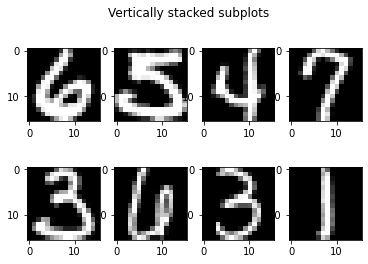

In [2]:
import numpy as np
import scipy
import scipy.io
import matplotlib.pyplot as plt
import os
from sklearn.model_selection import train_test_split

def display_img():
    # Load the data
    data = scipy.io.loadmat(r'.\data\MNIST.mat')

    X = data['X']
    I = data['I']
    I = I[0,:]

    # Visualize an image

    
    
    fig, axs = plt.subplots(2, 4)
    fig.suptitle('Vertically stacked subplots')
    
    axs[0][0].imshow(np.reshape(X[:,0],(16, 16)), cmap='gray')
    axs[0][1].imshow(np.reshape(X[:,1],(16, 16)), cmap='gray')
    axs[0][2].imshow(np.reshape(X[:,2],(16, 16)), cmap='gray')
    axs[0][3].imshow(np.reshape(X[:,3],(16, 16)), cmap='gray')
    axs[1][0].imshow(np.reshape(X[:,4],(16, 16)), cmap='gray')
    axs[1][1].imshow(np.reshape(X[:,5],(16, 16)), cmap='gray')
    axs[1][2].imshow(np.reshape(X[:,6],(16, 16)), cmap='gray')
    axs[1][3].imshow(np.reshape(X[:,7],(16, 16)), cmap='gray')
    
    
display_img()  

   • Extract from $X$ those columns that corresponds to digits 3 or 4. Those digits represents the classes $C_1$ and $C_2$
   defined above.
   
   • Split the obtained dataset in training and testing. From now on, we will only consider the training set. The test set will
   be only used at the end of the exercise to test the algorithm.
   
   • Create the matrices $X_1$ and $X_2$ defined above from $X$.
   
   • Compute the SVD decomposition of $X_1$ and $X_2$ with **np.linalg.svd(matrix, full matrices=False)** and denote 
   the $U$-part of the two decompositions as $U_1$ and $U_2$.
   
   • Take an unknown digit $y$ from the test set, and compute $y^\perp_1 = U_1(U^T_1y)$ and $y^\perp_2 = U_2(U^T_2y)$.
   
   • Compute the distances $d_1 = \|y-y^\perp_1\|_2$ and $d_2 = \|y-y^\perp_2\|_2$ and classify $y$ to $C_1$ if $d1 < d2$ and
   to $C_2$ if $d2 < d1$.
   
   • Repeat the experiment for different values of $y$ in the test set. Compute the misclassification number for this
   algorithm.
   
   • Repeat the experiment for different digits other than 3 or 4. There is a relationship between the visual similarity of the
   digits and the classification error?
   
   • Comment the obtained results.

In [9]:
def mnist_svd(digits, test_n = 0.8):
    
    # Load the data
    data = scipy.io.loadmat(r'.\data\MNIST.mat')

    X = data['X']
    I = data['I']
    I = I[0,:]

    # Extract the subdataset of X that contains all the digits specified in the corresponding array 
    # (in each cycle extracts the columns corresponding to a label)

    searchd_class_mask = np.zeros(len(I), dtype=bool)
    for i in range(len(I)):
        for d in digits:
            if (I[i] == d):
                searchd_class_mask[i] = True
                
    X= X[:, searchd_class_mask]
    I = I[searchd_class_mask]

    # Separate training and test

    X_train, X_test, I_train, I_test = train_test_split(X.T, I, test_size=test_n, random_state=42)

    X_train = X_train.T
    X_test = X_test.T

    # Create the matrices X_part, one for each class
    X_part = []
    for i in range(len(digits)):
        X_part.append(X_train[:, I_train == digits[i]])
    
    # print number of elements used for training on each class
    for d in digits:
        nelements = I_train[I_train==d]
        print("Class: ", d ," elements: ", len(nelements))
        
 
    # Compute the SVD decomposition of the X_part matrices
    U = []
    for i in range(len(digits)):
        u, _, _ = np.linalg.svd(X_part[i], full_matrices=False)
        U.append(u)

    # Take a new, unknown digit for the test set.

    test_passed = 0

    for i in range (len(I_test)):
        y = X_test[:, i]

        #plt.imshow(np.reshape(y,(16, 16)), cmap='gray')
        #plt.show()
        
        # Compute the projections of y into the (trained images) spaces
        y_projection = []
        for z in range(len(digits)):
            y_projection.append(U[z] @ (U[z].T @ y))

        # Compute the distances
        d = []
        for j in range(len(digits)):
            d.append(np.linalg.norm((y-y_projection[j]),2))

        # Assign to the predicted class
        for k in range(len(digits)):
            if (d[k] == min(d)):
                predicted_class = "c" + str(k)
                predicted = digits[k]
                
        if predicted == I_test[i]:
            test_passed = test_passed + 1
                        
        # Print out
        #print("Predicted: ", predicted,"     Truth:", I_test[i],"  Result:  ", (predicted == I_test[i]))
    
    print("\n"+"Digits to classify: " + str(digits))
    print("Testing: ",test_n*100,"%" )
    print("total tests: " + str(len(I_test)))
    print("passed tests: " + str(test_passed))
    accuracy = test_passed/len(I_test)*100
    print("accuracy: ",accuracy," %")
    print("misclassification number: ",100-accuracy, " %")
    print("_________________________________")
    
    

digits = [3, 4]    
mnist_svd(digits,0.2)

    
digits = [3, 4]    
mnist_svd(digits)


digits = [1, 4]    
mnist_svd(digits)


digits = [8, 9]    
mnist_svd(digits)


digits = [5, 6]    
mnist_svd(digits)

digits = [3, 8]    
mnist_svd(digits)

digits = [1, 7]    
mnist_svd(digits)

digits = [0, 8]    
mnist_svd(digits)

digits = [0, 6]    
mnist_svd(digits)

Class:  3  elements:  106
Class:  4  elements:  96

Digits to classify: [3, 4]
Testing:  20.0 %
total tests: 51
passed tests: 50
accuracy:  98.0392156862745  %
misclassification number:  1.9607843137254974  %
_________________________________
Class:  3  elements:  24
Class:  4  elements:  26

Digits to classify: [3, 4]
Testing:  80.0 %
total tests: 203
passed tests: 200
accuracy:  98.52216748768473  %
misclassification number:  1.477832512315274  %
_________________________________
Class:  1  elements:  54
Class:  4  elements:  20

Digits to classify: [1, 4]
Testing:  80.0 %
total tests: 300
passed tests: 290
accuracy:  96.66666666666667  %
misclassification number:  3.3333333333333286  %
_________________________________
Class:  8  elements:  31
Class:  9  elements:  24

Digits to classify: [8, 9]
Testing:  80.0 %
total tests: 221
passed tests: 220
accuracy:  99.5475113122172  %
misclassification number:  0.4524886877828038  %
_________________________________
Class:  5  elements:  18

The misclassification error for the classification of 3 and 4 is quite low ~2% : this feature depends a lot from the fraction of the dataset used for training (changing the **random choice seed to choose the training column** is a big factor in this process).

The fact that the training set may be chosen in un **unbalanced** way (that may contain an unequal number of 3s and 4s) can cause our tool to be trained more in recognizing one digit instead of the other digit (especially if they're similar).

Using an 80-20 configuration for training and testing we have an overfitted model, that gives an higher percentage of misclassification error for unseen (test) data.

Moreover we should highlight that most of the errors depend from the fact that some numbers are not well written and easily distinguishable from others (even by humans). In some cases, like the number 0, we have many similar numbers due to the **roundness** (3,5,6,8,9) 

## Second Exercise N-Class classification algorithm 
The extension of this idea to the multiple classification task is trivial. Indeed, if we have more than
2 classes (say, $k$ different classes) $C_1,...,C_k$, we just need to repeat the same procedure as before for
each matrix $X_1,...,X_k$ to obtain the distances $d_1,...,d_k$. Then, the new digit $y$ will be classified as
$C_i$ if $d_i$ is lower that $d_j$ for each $j = 1,...,k$.
Repeat the exercise above with a 3-digit example. Comment the differences

In [26]:
digits = [1, 2, 3]    
mnist_svd(digits)

digits = [1, 8, 0]    
mnist_svd(digits)

digits = [7, 5, 0]    
mnist_svd(digits)

digits = [1, 2, 3, 4, 5, 6, 7, 8, 9, 0]    
mnist_svd(digits)
mnist_svd(digits,0.2)


Class:  1  elements:  51
Class:  2  elements:  45
Class:  3  elements:  21

Digits to classify: [1, 2, 3]
Testing:  80.0 %
total tests: 468
passed tests: 448
accuracy:  95.72649572649573  %
misclassification number:  4.2735042735042725  %
_________________________________
Class:  1  elements:  52
Class:  8  elements:  31
Class:  0  elements:  60

Digits to classify: [1, 8, 0]
Testing:  80.0 %
total tests: 572
passed tests: 550
accuracy:  96.15384615384616  %
misclassification number:  3.8461538461538396  %
_________________________________
Class:  7  elements:  39
Class:  5  elements:  15
Class:  0  elements:  60

Digits to classify: [7, 5, 0]
Testing:  80.0 %
total tests: 459
passed tests: 421
accuracy:  91.72113289760348  %
misclassification number:  8.278867102396518  %
_________________________________
Class:  1  elements:  50
Class:  2  elements:  43
Class:  3  elements:  29
Class:  4  elements:  21
Class:  5  elements:  19
Class:  6  elements:  27
Class:  7  elements:  40
Class: 

Indeed, changing the number of classes to be identified, misclassification **error increases due to the multiplicity of the distances calculated**, which (as said in the prevoius point) depends on the images chosen for the training set. The observations done in the previous part have an amplified effect.